In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic = pd.read_csv('./train.csv')
df = titanic.copy()
tes_df = pd.read_csv('./test.csv')
test_df = tes_df.copy()
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
def col_names(dfs):
    dfs.columns = map(str.lower, dfs.columns)
    dfs.rename(columns={'passengerid':'passengerId'}, inplace=True)
    
col_names(df)
df.head(3)

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
def two_digit(dfs):
    dfs.fare = dfs.fare.round(2)
    
two_digit(df)
df.head(3)

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S


In [5]:
def cat_type(dfs):
    
    cat_col = ['name', 'sex', 'ticket', 'cabin', 'embarked']
    
    for col in cat_col:
        dfs[col] = dfs[col].astype('category')

cat_type(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerId  891 non-null    int64   
 1   survived     891 non-null    int64   
 2   pclass       891 non-null    int64   
 3   name         891 non-null    category
 4   sex          891 non-null    category
 5   age          714 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    category
 9   fare         891 non-null    float64 
 10  cabin        204 non-null    category
 11  embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


### Dealing with Missing Values

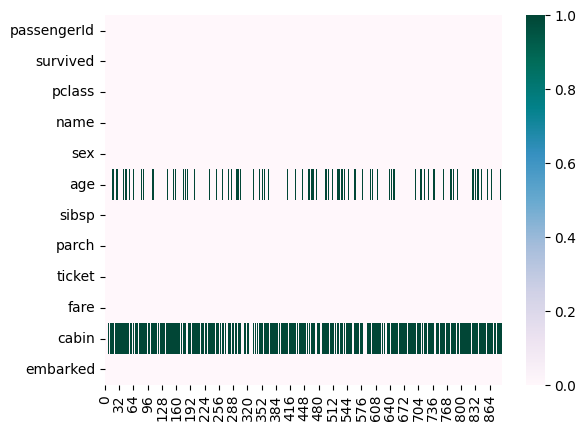

In [7]:
missing_val = sns.heatmap(df.isna().transpose(), cmap='PuBuGn')
missing_val;

In [8]:
df.cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Name: cabin, Length: 147, dtype: int64

In [9]:
def fill_missing_val(dfs):
    mean = dfs.age.mean()
    dfs.age.fillna(mean, inplace=True)
    dfs.age = dfs.age.astype(int)
    dfs.dropna(subset='embarked', inplace=True)
    
fill_missing_val(df)

In [10]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [11]:
df.age.value_counts()

29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: age, Length: 71, dtype: int64

In [12]:
df.isna().sum()

passengerId    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [13]:
df[['age','fare']].describe()

,age,fare
count,889.000000,889.000000
mean,29.498313,32.096839
std,12.979638,49.697490
min,0.000000,0.000000
25%,22.000000,7.900000
50%,29.000000,14.450000
75%,35.000000,31.000000
max,80.000000,512.330000


### Data Visualization

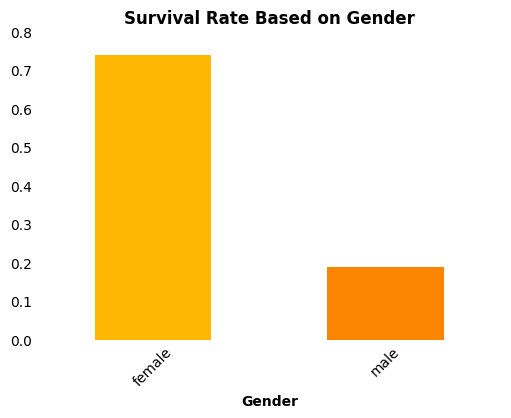

In [14]:
fig, ax = plt.subplots(figsize=(6,4))

ax = df.groupby('sex').survived.mean().plot.bar(color=['#ffb703', '#fb8500']);
ax.tick_params(axis=u'both', which='both',length=0)
ax.set_title('Survival Rate Based on Gender', fontsize=12, weight='bold')

plt.ylim([0,0.8])
plt.xticks(rotation=45)
plt.xlabel('Gender', weight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.savefig('Survival Rate Based on Gender.png', dpi=150)

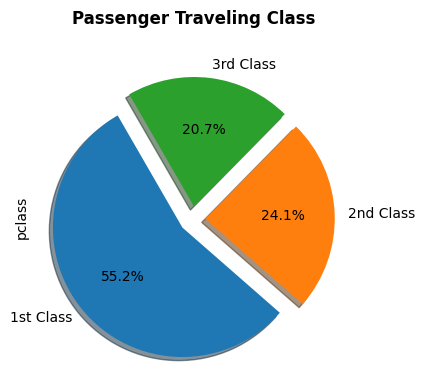

In [15]:
labels = ['1st Class', '2nd Class', '3rd Class']
explode = [0.1,0.1,0.1]

fig, ax = plt.subplots(figsize=(4,4))

ax = df.pclass.value_counts().plot(kind='pie', 
                                   labels = labels, 
                                   explode=explode, 
                                   startangle=120, 
                                   shadow=True, 
                                   autopct='%1.1f%%')
ax.set_title('Passenger Traveling Class', 
             fontsize=12, 
             weight='bold', 
             y=1.1)
ax.axis('equal');
plt.savefig('Passenger Traveling Class.png', dpi=200)

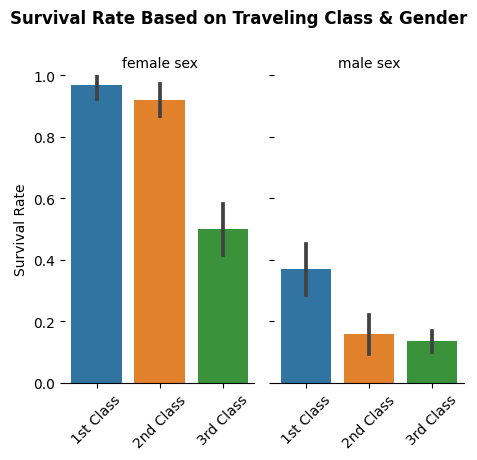

In [16]:
g = sns.catplot(
    data=df, x="pclass", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["1st Class", "2nd Class", "3rd Class"], rotation=45)
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)
g.fig.suptitle('Survival Rate Based on Traveling Class & Gender', 
               y=1.08, fontsize=12, weight='bold')

plt.savefig('Survival Rate Based on Traveling Class & Gender.png', dpi=200)
plt.show()

In [17]:
df.parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

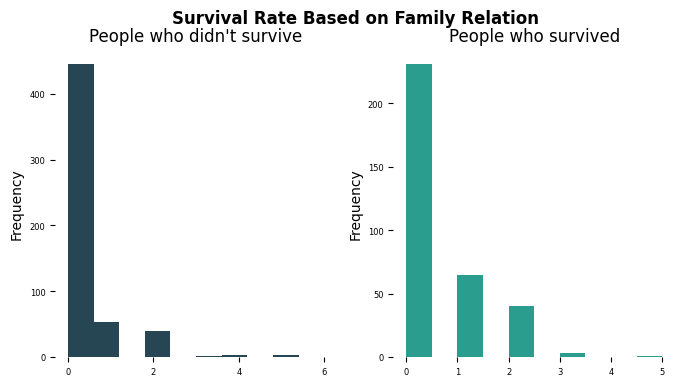

In [18]:
not_survived_parch = df['parch'][df['survived'] == 0]
survived_parch = df['parch'][df['survived'] == 1]

plt.figure(figsize=(8,4))

plt.subplot(121)
not_survived_parch.plot(kind='hist',title = "People who didn't survive", color='#264653', fontsize=6)

plt.subplot(122)
survived_parch.plot(kind='hist', title= 'People who survived', color='#2a9d8f', fontsize=6)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.suptitle('Survival Rate Based on Family Relation', fontsize=12, weight='bold')
plt.savefig('Survival Rate Based on Family Relation', dpi=150)
plt.show()

In [19]:
# Age comparison with other variables
df.corr(numeric_only=True).age

passengerId    0.030842
survived      -0.072695
pclass        -0.331685
age            1.000000
sibsp         -0.231992
parch         -0.175770
fare           0.090883
Name: age, dtype: float64

In [20]:
def titles(dfs):
    dfs['title'] = dfs.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
titles(df)

In [21]:
df['title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

In [22]:
def titles_replace(dfs):
    
    # Values lower than 40 replacing with rare
    dfs.title.replace(['Dr', 'Rev', 'Mlle', 'Major', 
                  'Col', 'Countess', 'Capt', 'Ms', 
                  'Sir', 'Lady', 'Mme', 'Don', 
                  'Jonkheer'], 'Rare', inplace=True)
    dfs.title.replace('Ms','Miss', inplace=True)
    dfs.title.replace('Mme','Mrs', inplace=True)
    
titles_replace(df)

In [23]:
df['title'] = df['title'].astype('category')

### Feature Engineering

In [24]:
np.random.seed(42)

# Split data into X and y
X = df.drop(['name', 'survived', 'ticket', 'cabin'], axis=1)
y = df.survived

# Split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X.head()

,passengerId,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,3,male,22,1,0,7.25,S,Mr
1,2,1,female,38,1,0,71.28,C,Mrs
2,3,3,female,26,0,0,7.92,S,Miss
3,4,1,female,35,1,0,53.10,S,Mrs
4,5,3,male,35,0,0,8.05,S,Mr


### Converting Data to Numbers 

In [26]:
cat_features = ['sex', 'embarked', 'title']

one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, cat_features)], 
                                remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.  ,  1.  ,  0.  , ...,  1.  ,  0.  ,  7.25],
       [ 1.  ,  0.  ,  1.  , ...,  1.  ,  0.  , 71.28],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  7.92],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  1.  ,  2.  , 23.45],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  0.  , 30.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  7.75]])

In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,22.0,1.0,0.0,7.25
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,38.0,1.0,0.0,71.28
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,26.0,0.0,0.0,7.92
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,35.0,1.0,0.0,53.10
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,3.0,35.0,0.0,0.0,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,887.0,2.0,27.0,0.0,0.0,13.00
885,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,888.0,1.0,19.0,0.0,0.0,30.00
886,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,889.0,3.0,29.0,1.0,2.0,23.45
887,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,890.0,1.0,26.0,0.0,0.0,30.00


In [28]:
np.random.seed(42)

# Split data into X and y
X = df.drop(['name', 'survived', 'ticket', 'cabin'], axis=1)
y = df.survived

# Split the data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 16), (178, 16), (711,), (178,))

In [30]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(), 
          'KNN': KNeighborsClassifier(), 
          'Random Forest Classifier': RandomForestClassifier(), 
          'Decision Tree Classifier': DecisionTreeClassifier()}

# Creating a function to fit & score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit & Evaluate given ML models.
    models: a dict of different sklearn ML models.
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model & append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.7921348314606742,
 'KNN': 0.6179775280898876,
 'Random Forest Classifier': 0.8033707865168539,
 'Decision Tree Classifier': 0.7528089887640449}

### Model Comparison

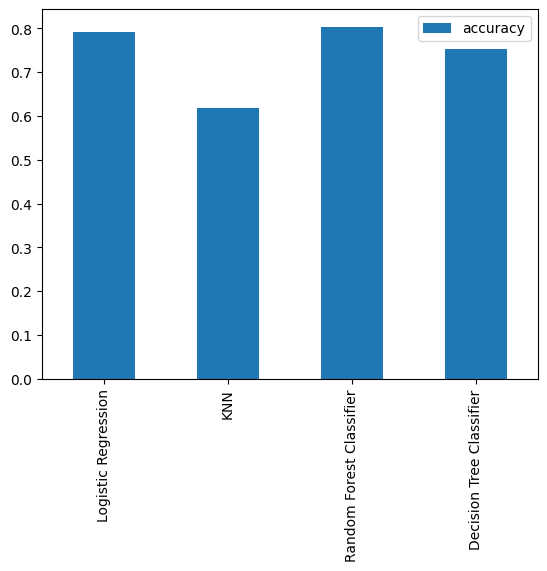

In [32]:
model_comp = pd.DataFrame(model_scores, index=['accuracy'])
model_comp.T.plot.bar();
plt.savefig('Model Selection', dpi=150)

### Tuning Hyperparameters with RandomizedSearchCV
* Logistic Regression
* Random Forest Classifier

In [33]:
# Create hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4,4,20), 
                'solver': ['liblinear']}

# Create hyperparameter grid for random forest classifier
rf_grid = {'n_estimators': np.arange(10,1000,50), 
           'criterion': ['gini', 'entropy'],
           'max_depth': range(2,20,1), 
           'min_samples_split': np.arange(2,20,2), 
           'min_samples_leaf': np.arange(2,20,2)}

#### Tuning Hyperparameters for Logistic Regression

In [34]:
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20, 
                                verbose=True)

# Fit model for logistic regression 
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
# Best hyperparameters for logistic regression
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [36]:
# For testing purpose not test_df
print(f'Logistic regression before tuning result 79.21%.\nResult after tuning {rs_log_reg.score(X_test, y_test)*100:.2f}%.')

Logistic regression before tuning result 79.21%.
Result after tuning 81.46%.


#### Tuning Hyperparameters for Random Forest Classifier

In [37]:
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rs_rf_grid = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid, 
                                cv=5, 
                                n_iter=20, 
                                verbose=True)

# Fit model for logistic regression 
rs_rf_grid.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
# Best hyperparameters for random forest classifier
rs_rf_grid.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 13,
 'criterion': 'entropy'}

In [39]:
# For testing purpose not test_df
print(f'Random forest classifier before tuning result 80.33%.\nResult after tuning {rs_rf_grid.score(X_test, y_test)*100:.2f}%.')

Random forest classifier before tuning result 80.33%.
Result after tuning 80.34%.


### Tuning Hyperparameters with GridSearchCV
* Logistic Regression

In [40]:
# Create hyperparameter grid for logistic regression
log_reg_grid = {'C': np.logspace(-4,4,30), 
                'solver': ['liblinear']}

np.random.seed(42)

# Setup random hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5,  
                          verbose=True)

# Fit model for logistic regression 
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
# Best hyperparameters for logistic regression
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8146067415730337

### Test Dataset 

In [43]:
# test_df

In [44]:
# X.head()

In [45]:
# col_names(test_df)
# two_digit(test_df)
# cat_type(test_df)
# titles(test_df)
# titles_replace(test_df)
# fill_missing_val(test_df)

In [46]:
# test_df['title'] = test_df.title.astype('category')
# test_df = test_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [47]:
# test_df.head(3)

In [48]:
# test_df.info()

### Evaluating Our Tuned Logistic Regression Model
* ROC Curve & AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score
* Cross Validation

In [49]:
# Making prediction to tuned Model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [50]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: survived, Length: 178, dtype: int64

#### ROC Curve & AUC Score

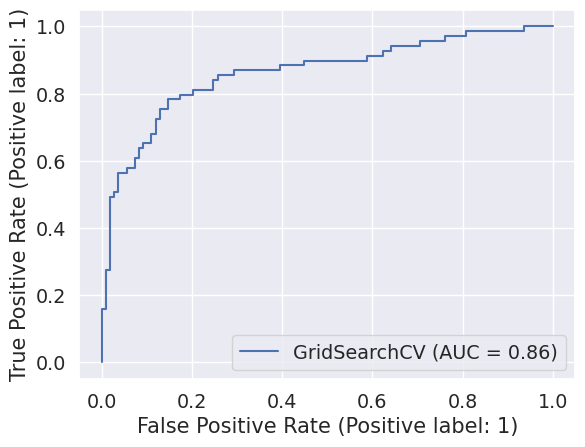

In [62]:
plot_roc_curve(gs_log_reg, X_test, y_test);
plt.savefig('ROC Curve.png', dpi=150)

#### Confusion Matrix

In [52]:
confusion_matrix(y_test, y_preds)

array([[91, 18],
       [15, 54]])

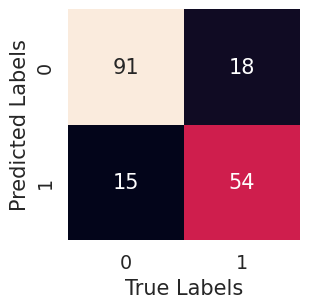

In [53]:
# Better Representation
sns.set(font_scale=1.25)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                     annot=True, cbar=False)
    
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    plt.savefig('Confusion Matrix.png', dpi = 150)
    
plot_conf_matrix(y_test, y_preds)

#### Classification Report

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.75      0.78      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



#### Cross Validation

In [55]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C = 0.7278953843983146, 
                         solver = 'liblinear')

In [57]:
# Cross Validation Accuracy
cv_acc = cross_val_score(clf, transformed_X, y, cv=5, scoring='accuracy')
cv_acc_mean = np.mean(cv_acc)
print(f'Cross Validated Accuracy: {cv_acc_mean*100:.2f}%')

Cross Validated Accuracy: 82.23%


In [58]:
# Cross Validation Precision
cv_pre = cross_val_score(clf, transformed_X, y, cv=5, scoring='precision')
cv_pre_mean = np.mean(cv_pre)
print(f'Cross Validated Precision: {cv_pre_mean*100:.2f}%')

Cross Validated Precision: 78.44%


In [59]:
# Cross Validation Recall Score
cv_recall = cross_val_score(clf, transformed_X, y, cv=5, scoring='recall')
cv_recall_mean = np.mean(cv_recall)
print(f'Cross Validated Recall Score: {cv_recall_mean*100:.2f}%')

Cross Validated Recall Score: 73.82%


In [60]:
# Cross Validation F1 Score
cv_f1 = cross_val_score(clf, transformed_X, y, cv=5, scoring='f1')
cv_f1_mean = np.mean(cv_f1)
print(f'Cross Validated F1 Score: {cv_f1_mean*100:.2f}%')

Cross Validated F1 Score: 75.90%


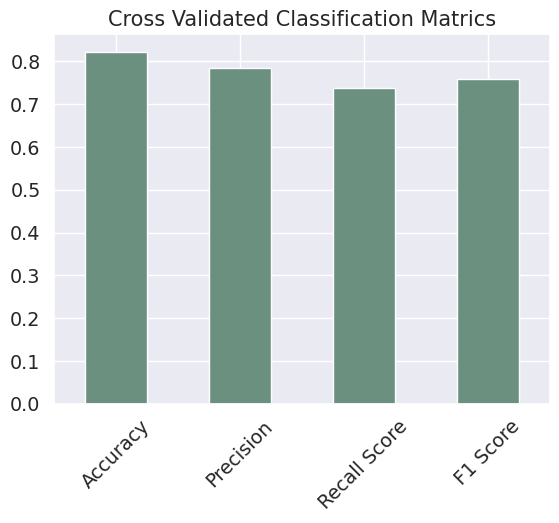

In [61]:
# Visualize Cross Validated Metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc_mean, 
                           'Precision' : cv_pre_mean, 
                           'Recall Score' : cv_recall_mean, 
                           'F1 Score' : cv_f1_mean}, index=[0])

cv_metrics.T.plot.bar(title = 'Cross Validated Classification Matrics', 
                      color='#6b9080', legend=False, rot=45);
plt.savefig('Cross Validated Classification Matrics.png', dpi=150)